In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.tree import DecisionTreeClassifier

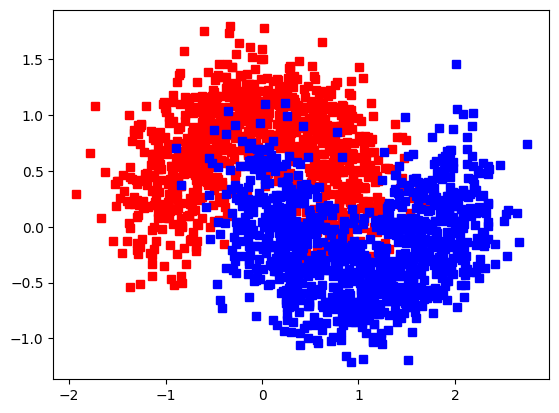

In [165]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)
plt.plot(X[y==0,0],X[y==0,1],'sr')
plt.plot(X[y==1,0],X[y==1,1],'sb')
plt.show()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)
x_valid, x_test_new, y_valid, y_test_new = train_test_split(x_test, y_test, test_size=0.5, random_state=19) # validation

In [166]:
model = DecisionTreeClassifier()
a = -2
b = 2
# Train the model using the training sets
model.fit(x_train,y_train)
predictKNNx = []
#Predict Output

tp = 0
predictTREE = model.predict(x_test)

for i in range(0, len(y_test)):
    if y_test[i] == predictTREE[i]:
        tp+=1

print(tp/len(predictTREE))

0.873


In [167]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 30]
k_accuracy = []

for k in k_choices:
    model = DecisionTreeClassifier(max_depth = k)
    model.fit(x_train,y_train)
    tp = 0
    predictKNN = model.predict(x_valid)

    for i in range(0, len(y_valid)):
        if y_valid[i] == predictKNN[i]:
            tp+=1
    k_accuracy.append((tp)/len(predictKNN))
print(k_accuracy)

[0.802, 0.88, 0.88, 0.902, 0.892, 0.892, 0.888, 0.878, 0.884]


5


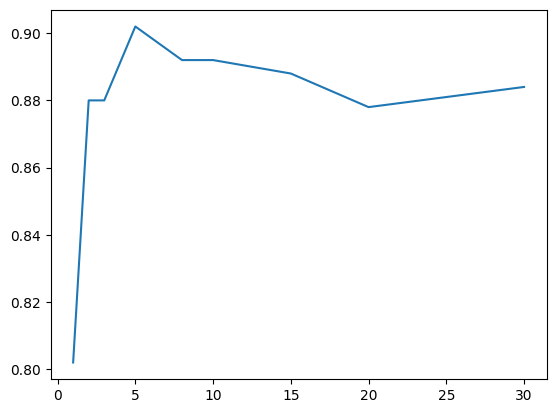

In [168]:
bestK = k_choices[k_accuracy.index(max(k_accuracy))]
print(bestK)
plt.plot(k_choices, k_accuracy)

In [169]:
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 30]
k_choices_name = ["gini", "entropy", "log_loss"]
k_accuracy_mat = []
for name in k_choices_name:
    k_accuracy = []
    for k in k_choices: 
        model = DecisionTreeClassifier(max_depth = k,criterion = name)
        model.fit(x_train,y_train)
        tp = 0
        predictKNN = model.predict(x_valid)

        for i in range(0, len(y_valid)):
            if y_valid[i] == predictKNN[i]:
                tp+=1
        k_accuracy.append((tp)/len(predictKNN))
    k_accuracy_mat.append(k_accuracy)
print(k_accuracy_mat)

[[0.802, 0.88, 0.88, 0.902, 0.892, 0.888, 0.876, 0.884, 0.882], [0.798, 0.878, 0.878, 0.894, 0.898, 0.882, 0.882, 0.89, 0.88], [0.798, 0.878, 0.878, 0.894, 0.898, 0.89, 0.88, 0.878, 0.88]]


bestKgini:  5
bestKentropy:  8
bestKlogloss:  8


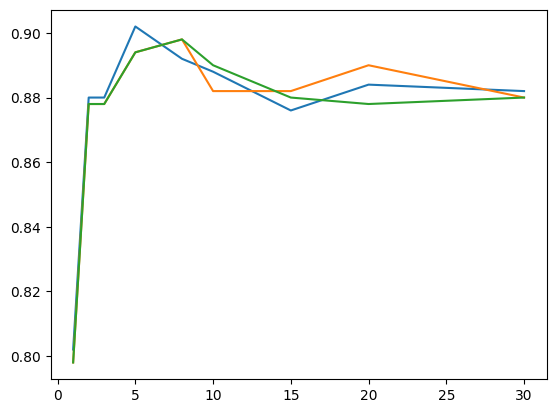

In [170]:
bestKgini = k_choices[k_accuracy_mat[0].index(max(k_accuracy_mat[0]))]
bestKentropy = k_choices[k_accuracy_mat[1].index(max(k_accuracy_mat[1]))]
bestKlogloss = k_choices[k_accuracy_mat[2].index(max(k_accuracy_mat[2]))]
print("bestKgini: ",bestKgini)
print("bestKentropy: ",bestKentropy)
print("bestKlogloss: ",bestKlogloss)
plt.plot(k_choices, k_accuracy_mat[0])
plt.plot(k_choices, k_accuracy_mat[1])
plt.plot(k_choices, k_accuracy_mat[2])

In [173]:
bestNames = [bestKgini, bestKentropy, bestKlogloss]
best = [max(k_accuracy_mat[0]), max(k_accuracy_mat[1]), max(k_accuracy_mat[2])]
bestCriteriaDepth = bestNames[best.index(max(best))]
if best.index(max(best)) == 0:
    bestCriteria = "gini"
elif best.index(max(best)) == 1:
    bestCriteria = "entropy"
else:
    bestCriteria = "log_loss"
print(bestCriteria, bestCriteriaDepth)

gini 5


In [172]:
model = DecisionTreeClassifier(max_depth = bestCriteriaDepth,criterion = bestCriteria)
a = -2
b = 2
# Train the model using the training sets
model.fit(x_train,y_train)
predictKNNx = []
#Predict Output

tp = 0
predictTREE = model.predict(x_test)

for i in range(0, len(y_test)):
    if y_test[i] == predictTREE[i]:
        tp+=1

print(tp/len(predictTREE))

0.878
